### This Notebook implements ROC-AUC of all data points, select interval between 300 - 450 ms and feed all data between this interval

In [1]:
import pandas as pd
import os
from tqdm import tqdm
import seaborn as sns
import mne
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import pearsonr
from sklearn.neighbors import NearestCentroid as NCC

In [2]:
eeg_channels = ['Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3',
    'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz',
    'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4',
    'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6',
    'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7',
    'POz', 'P08', 'O1', 'O2']

eog_channel = 'EOG' 

all_channels = eeg_channels + [eog_channel]
all_labels = pd.read_csv('dataset/TrainLabels.csv').Prediction.values

In [3]:
try:
    all_epochs = np.load('all_epochs.npy')
except:
    print("No file is found")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Step 1: Split epochs into training and validation sets
# Assuming 'all_epochs' is your dataset and 'all_labels' is the corresponding labels

# Split the data into train and validation (80% train, 20% validation)
train_epochs, val_epochs, train_labels, val_labels = train_test_split(
    all_epochs, all_labels, test_size=0.2, random_state=42)

# Step 2: Compute ROC-AUC for each channel using only the training data
channel_to_roc = {}

for id, channel in tqdm(enumerate(eeg_channels)):
    # Get the channel data for training epochs only
    channel_data_train = [epoch[:, id] for epoch in train_epochs]
    channel_data_train = np.array(channel_data_train)  # Shape: (n_train_epochs, n_timepoints)
    
    print(f"Channel {channel} - channel_data_train shape: {channel_data_train.shape}")
    
    rocs = []
    
    # Loop over each time point (no averaging, calculate AUC for each time point)
    for time_point in range(channel_data_train.shape[1]):  # Looping over time points directly
        time_point_data = channel_data_train[:, time_point]  # Get the data for the current time point
        try:
            roc = roc_auc_score(train_labels, time_point_data)  # Calculate AUC for this time point
            rocs.append(roc)
        except ValueError as e:
            print(f"Error at time_point {time_point} for channel {channel}: {e}")
    
    # Store the ROC-AUC scores for this channel
    channel_to_roc[channel] = rocs

0it [00:00, ?it/s]

Channel Fp1 - channel_data_train shape: (4352, 240)


1it [00:00,  1.50it/s]

Channel Fp2 - channel_data_train shape: (4352, 240)


2it [00:01,  1.52it/s]

Channel AF7 - channel_data_train shape: (4352, 240)


3it [00:02,  1.26it/s]

Channel AF3 - channel_data_train shape: (4352, 240)


4it [00:02,  1.38it/s]

Channel AF4 - channel_data_train shape: (4352, 240)


5it [00:03,  1.46it/s]

Channel AF8 - channel_data_train shape: (4352, 240)


6it [00:04,  1.54it/s]

Channel F7 - channel_data_train shape: (4352, 240)


7it [00:04,  1.56it/s]

Channel F5 - channel_data_train shape: (4352, 240)


8it [00:05,  1.54it/s]

Channel F3 - channel_data_train shape: (4352, 240)


9it [00:06,  1.50it/s]

Channel F1 - channel_data_train shape: (4352, 240)


10it [00:06,  1.59it/s]

Channel Fz - channel_data_train shape: (4352, 240)


11it [00:07,  1.63it/s]

Channel F2 - channel_data_train shape: (4352, 240)


12it [00:07,  1.59it/s]

Channel F4 - channel_data_train shape: (4352, 240)


13it [00:08,  1.47it/s]

Channel F6 - channel_data_train shape: (4352, 240)


14it [00:09,  1.48it/s]

Channel F8 - channel_data_train shape: (4352, 240)


15it [00:09,  1.52it/s]

Channel FT7 - channel_data_train shape: (4352, 240)


16it [00:10,  1.56it/s]

Channel FC5 - channel_data_train shape: (4352, 240)


17it [00:11,  1.57it/s]

Channel FC3 - channel_data_train shape: (4352, 240)


18it [00:11,  1.58it/s]

Channel FC1 - channel_data_train shape: (4352, 240)


19it [00:12,  1.61it/s]

Channel FCz - channel_data_train shape: (4352, 240)


20it [00:12,  1.66it/s]

Channel FC2 - channel_data_train shape: (4352, 240)


21it [00:13,  1.60it/s]

Channel FC4 - channel_data_train shape: (4352, 240)


22it [00:14,  1.61it/s]

Channel FC6 - channel_data_train shape: (4352, 240)


23it [00:14,  1.64it/s]

Channel FT8 - channel_data_train shape: (4352, 240)


24it [00:15,  1.69it/s]

Channel T7 - channel_data_train shape: (4352, 240)


25it [00:16,  1.63it/s]

Channel C5 - channel_data_train shape: (4352, 240)


26it [00:16,  1.55it/s]

Channel C3 - channel_data_train shape: (4352, 240)


27it [00:17,  1.57it/s]

Channel C1 - channel_data_train shape: (4352, 240)


28it [00:18,  1.54it/s]

Channel Cz - channel_data_train shape: (4352, 240)


29it [00:18,  1.55it/s]

Channel C2 - channel_data_train shape: (4352, 240)


30it [00:19,  1.48it/s]

Channel C4 - channel_data_train shape: (4352, 240)


31it [00:20,  1.50it/s]

Channel C6 - channel_data_train shape: (4352, 240)


32it [00:20,  1.53it/s]

Channel T8 - channel_data_train shape: (4352, 240)


33it [00:21,  1.58it/s]

Channel TP7 - channel_data_train shape: (4352, 240)


34it [00:21,  1.60it/s]

Channel CP5 - channel_data_train shape: (4352, 240)


35it [00:22,  1.61it/s]

Channel CP3 - channel_data_train shape: (4352, 240)


36it [00:23,  1.63it/s]

Channel CP1 - channel_data_train shape: (4352, 240)


37it [00:23,  1.62it/s]

Channel CPz - channel_data_train shape: (4352, 240)


38it [00:24,  1.61it/s]

Channel CP2 - channel_data_train shape: (4352, 240)


39it [00:24,  1.62it/s]

Channel CP4 - channel_data_train shape: (4352, 240)


40it [00:25,  1.61it/s]

Channel CP6 - channel_data_train shape: (4352, 240)


41it [00:26,  1.59it/s]

Channel TP8 - channel_data_train shape: (4352, 240)


42it [00:26,  1.61it/s]

Channel P7 - channel_data_train shape: (4352, 240)


43it [00:27,  1.55it/s]

Channel P5 - channel_data_train shape: (4352, 240)


44it [00:28,  1.44it/s]

Channel P3 - channel_data_train shape: (4352, 240)


45it [00:29,  1.47it/s]

Channel P1 - channel_data_train shape: (4352, 240)


46it [00:29,  1.53it/s]

Channel Pz - channel_data_train shape: (4352, 240)


47it [00:30,  1.53it/s]

Channel P2 - channel_data_train shape: (4352, 240)


48it [00:30,  1.60it/s]

Channel P4 - channel_data_train shape: (4352, 240)


49it [00:31,  1.68it/s]

Channel P6 - channel_data_train shape: (4352, 240)


50it [00:32,  1.64it/s]

Channel P8 - channel_data_train shape: (4352, 240)


51it [00:32,  1.69it/s]

Channel PO7 - channel_data_train shape: (4352, 240)


52it [00:33,  1.68it/s]

Channel POz - channel_data_train shape: (4352, 240)


53it [00:33,  1.74it/s]

Channel P08 - channel_data_train shape: (4352, 240)


54it [00:34,  1.76it/s]

Channel O1 - channel_data_train shape: (4352, 240)


55it [00:34,  1.72it/s]

Channel O2 - channel_data_train shape: (4352, 240)


56it [00:35,  1.58it/s]


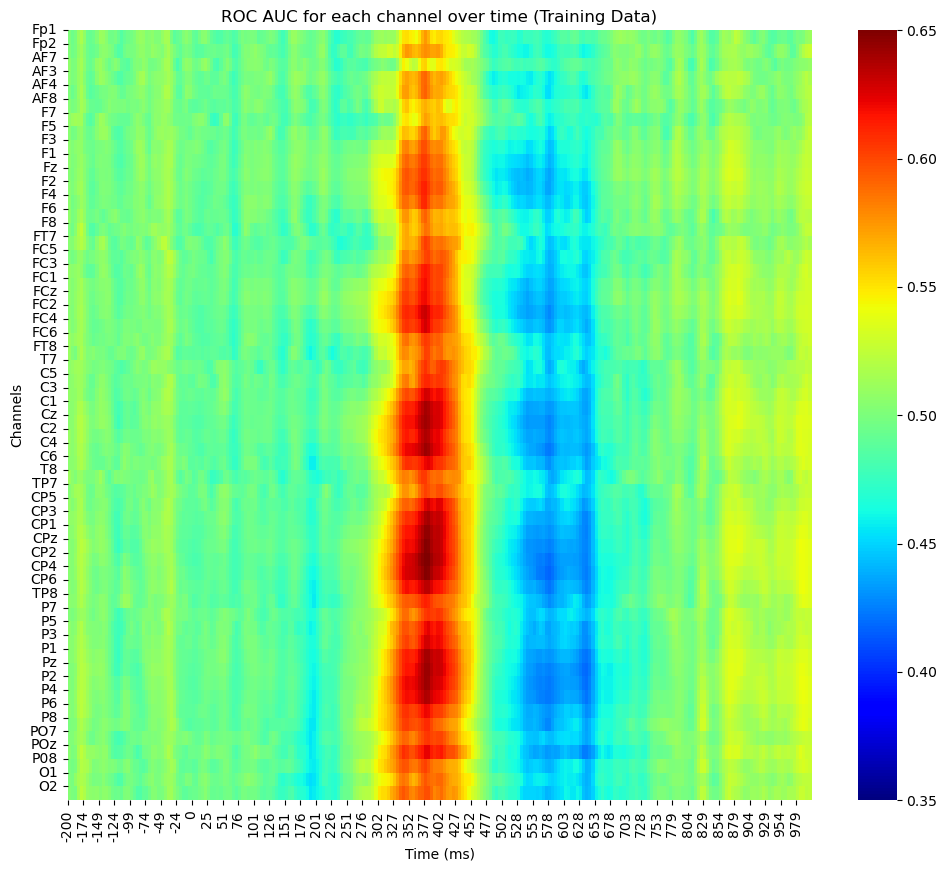

In [5]:
# Step 3: Plot the ROC-AUC heatmap for training data
arr = np.array([channel_to_roc[channel] for channel in eeg_channels])

# Generate time labels from -200 ms to 1000 ms, rounded to integers
time_labels = np.linspace(-200, 1000, arr.shape[1]).astype(int)

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(arr, cmap='jet', vmin=0.35, vmax=0.65)

# Adjust xticks to show every 5th timepoint for better readability
plt.xticks(np.arange(0, arr.shape[1], 5), time_labels[::5], rotation=90)  
plt.yticks(np.arange(0, len(eeg_channels)), eeg_channels, rotation=0)

# Labeling the axes and title
plt.xlabel('Time (ms)')
plt.ylabel('Channels')
plt.title('ROC AUC for each channel over time (Training Data)')

# Display the plot
plt.show()

#### Select time range between 300 - 450 ms from ROC-AUC analysis

time_in_ms = time_point * 5 - 200 

In [6]:
X = []
selected_timepoints = list(range(100, 131))  # inclusive of 130
features = [f"{channel} voltage at {time_point * 5 - 200} ms" 
            for channel in eeg_channels for time_point in selected_timepoints]

for id in tqdm(range(len(eeg_channels))):
    channel_data = [epoch[:, id] for epoch in all_epochs]  # shape: (n_epochs, n_timepoints)
    channel_data = np.array(channel_data)  # shape: (n_epochs, 240)

    for time_point in selected_timepoints:
        time_point_data = channel_data[:, time_point]  # shape: (n_epochs,)
        X.append(time_point_data)

X = np.array(X).T  # shape: (n_samples, n_features)
print(X.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:02<00:00, 26.65it/s]


(5440, 1736)


In [7]:
# Train/val split
X_train, X_test, y_train, y_test = train_test_split(X, all_labels, test_size=0.2, random_state=42)

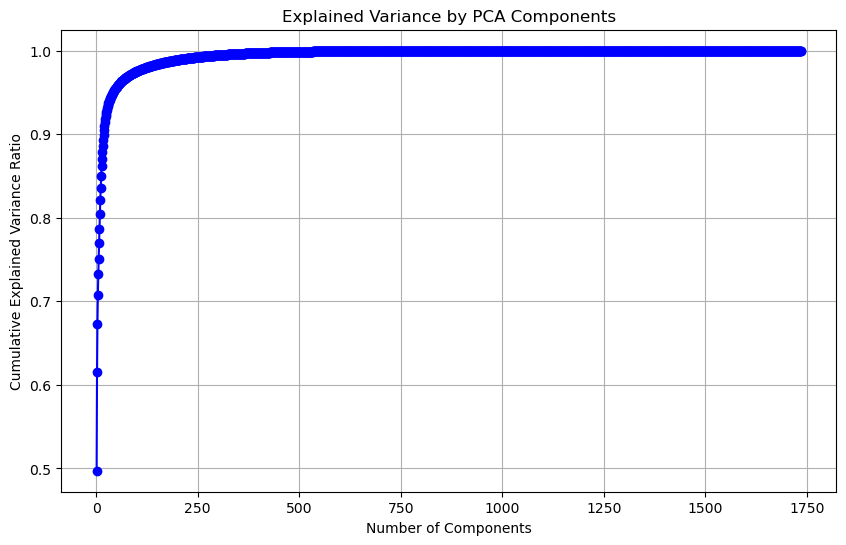

Number of components to explain variance:
90.0% variance: 19 components
95.0% variance: 42 components
97.5% variance: 99 components
99.0% variance: 213 components
99.9% variance: 525 components


In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Determine number of components for different variance thresholds
variance_thresholds = [0.90, 0.95, 0.975, 0.99, 0.999]
components_for_thresholds = {
    threshold: np.argmax(cumulative_variance_ratio >= threshold) + 1 
    for threshold in variance_thresholds
}

print("Number of components to explain variance:")
for threshold, num_components in components_for_thresholds.items():
    print(f"{threshold*100}% variance: {num_components} components")

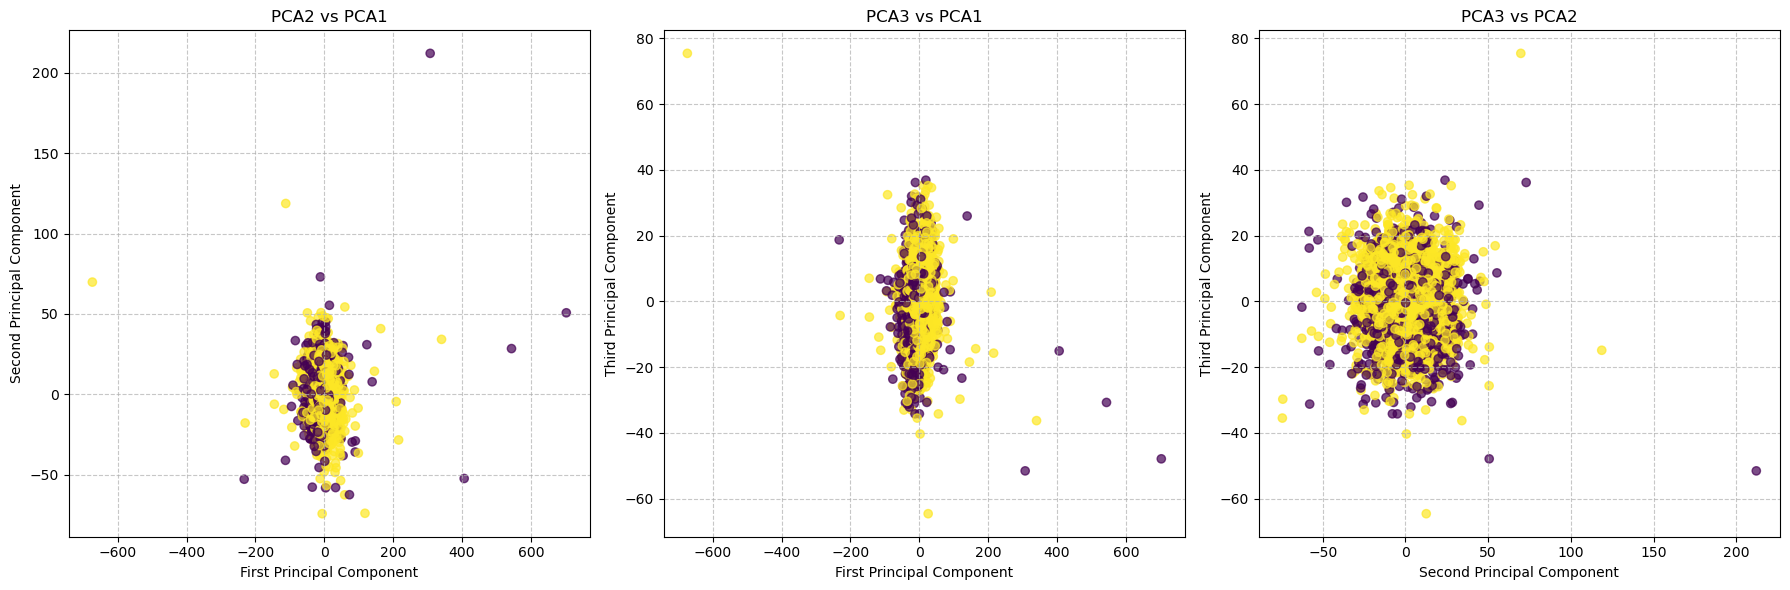

Variance explained by first 3 principal components:
PC1: 0.4973 (49.73%)
PC2: 0.1176 (11.76%)
PC3: 0.0580 (5.80%)
Total: 0.6729 (67.29%)


In [9]:
# Create a figure with 3 subplots for PCA visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot PCA2 vs PCA1
scatter1 = axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].set_title('PCA2 vs PCA1')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot PCA3 vs PCA1
scatter2 = axes[1].scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=y_train, cmap='viridis', alpha=0.7)
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Third Principal Component')
axes[1].set_title('PCA3 vs PCA1')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot PCA3 vs PCA2
scatter3 = axes[2].scatter(X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', alpha=0.7)
axes[2].set_xlabel('Second Principal Component')
axes[2].set_ylabel('Third Principal Component')
axes[2].set_title('PCA3 vs PCA2')
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Display variance explained by the first three components
print(f"Variance explained by first 3 principal components:")
print(f"PC1: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.2f}%)")
print(f"PC2: {explained_variance_ratio[1]:.4f} ({explained_variance_ratio[1]*100:.2f}%)")
print(f"PC3: {explained_variance_ratio[2]:.4f} ({explained_variance_ratio[2]*100:.2f}%)")
print(f"Total: {sum(explained_variance_ratio[:3]):.4f} ({sum(explained_variance_ratio[:3])*100:.2f}%)")

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform PCA to retain 95% of the variance
pca = PCA(n_components=0.95)  # This will retain enough components to explain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)

print(f"Number of components chosen by PCA: {pca.n_components_}")
print(f"Variance explained by the selected components: {sum(pca.explained_variance_ratio_)}")

Number of components chosen by PCA: 42
Variance explained by the selected components: 0.95039492891758


### LDA 

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.17      0.25       303
           1       0.74      0.93      0.83       785

    accuracy                           0.72      1088
   macro avg       0.61      0.55      0.54      1088
weighted avg       0.67      0.72      0.66      1088



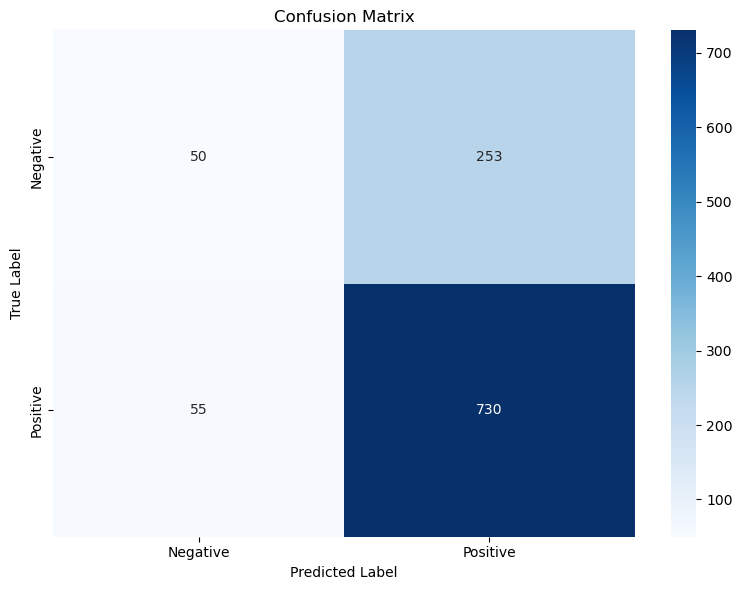

ROC AUC Score: 0.5475


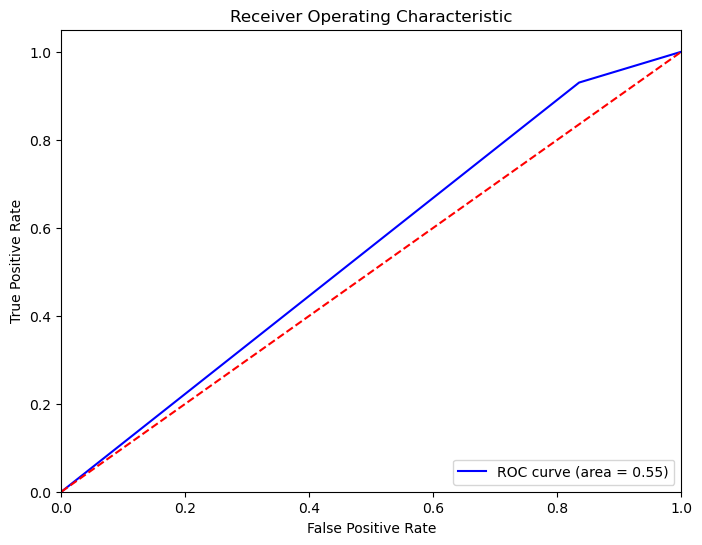

In [11]:
from sklearn.metrics import roc_curve

# Create an LDA model
lda = LDA()
lda.fit(X_train_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
y_pred_lda = lda.predict(X_test_pca)

# Print metrics
print("LDA Classification Report:")
print(classification_report(y_test, y_pred_lda))

# Create confusion matrix display
conf_matrix = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC for LDA:
roc_auc_score_value = roc_auc_score(y_test, y_pred_lda)
print(f"ROC AUC Score: {roc_auc_score_value:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score_value)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### NCC

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.60      0.45       303
           1       0.79      0.59      0.68       785

    accuracy                           0.59      1088
   macro avg       0.58      0.59      0.56      1088
weighted avg       0.67      0.59      0.61      1088



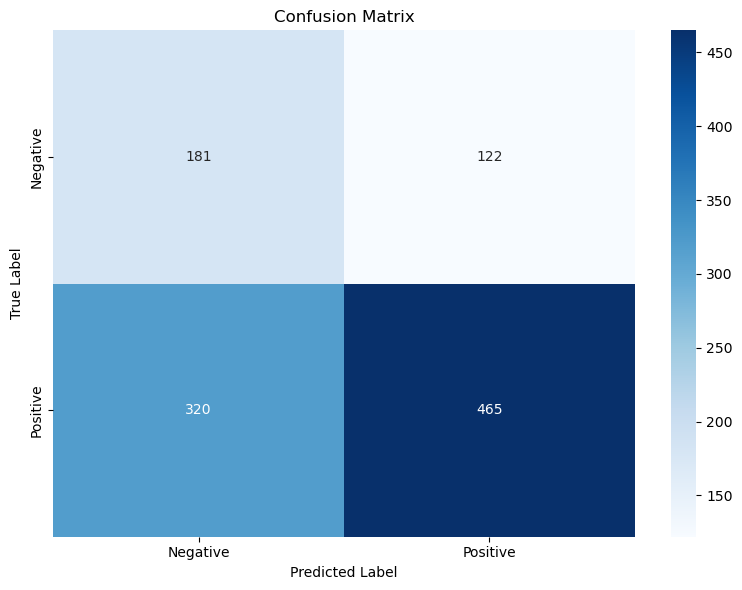

ROC AUC Score: 0.5949


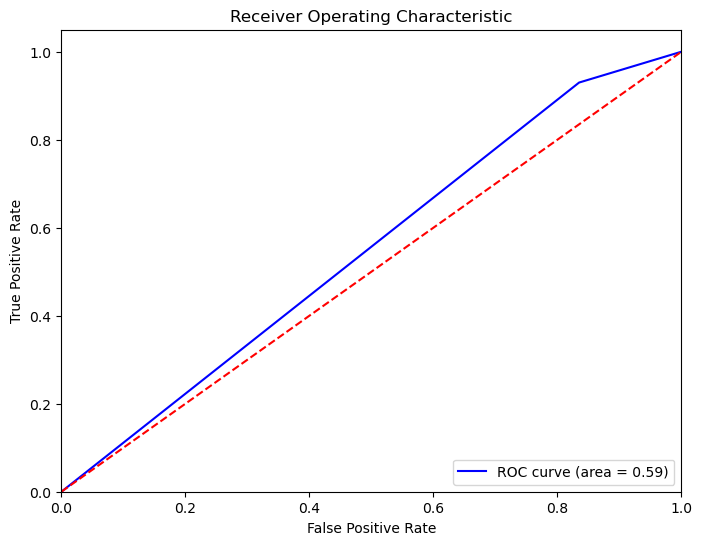

In [13]:
# Let's fit an NCC model

ncc = NCC()
ncc.fit(X_train_pca, y_train)
y_pred_lr = ncc.predict(X_test_pca)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

conf_matrix_ncc = confusion_matrix(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC for NCC:
roc_auc_score_value = roc_auc_score(y_test, y_pred_lr)
print(f"ROC AUC Score: {roc_auc_score_value:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score_value)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### R-LDA

Regularized LDA (R-LDA) Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.16      0.24       303
           1       0.74      0.94      0.83       785

    accuracy                           0.72      1088
   macro avg       0.63      0.55      0.54      1088
weighted avg       0.68      0.72      0.67      1088



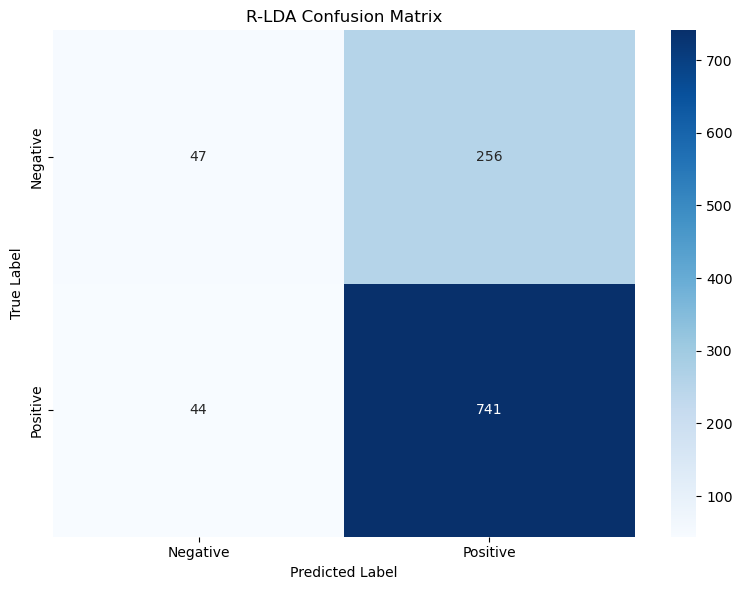

R-LDA ROC AUC Score: 0.5495


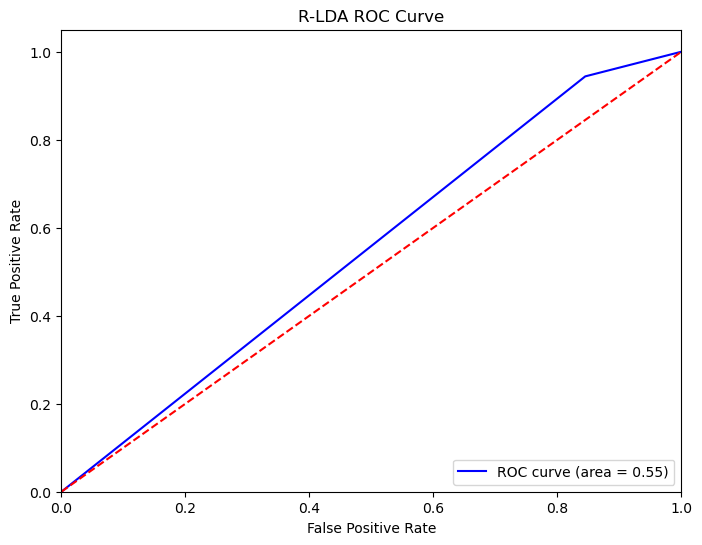

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train LDA with shrinkage (real R-LDA)
rlda = LDA(solver='lsqr', shrinkage=0.5)  # 'auto' lets sklearn choose optimal shrinkage via Ledoit-Wolf
rlda.fit(X_train_pca, y_train)

# Predict
y_pred_rlda = rlda.predict(X_test_pca)

# Classification report
print("Regularized LDA (R-LDA) Classification Report:")
print(classification_report(y_test, y_pred_rlda))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rlda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('R-LDA Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_rlda)
print(f"R-LDA ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rlda)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('R-LDA ROC Curve')
plt.legend(loc='lower right')
plt.show()


### RF

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.16      0.24       303
           1       0.74      0.95      0.84       785

    accuracy                           0.73      1088
   macro avg       0.65      0.55      0.54      1088
weighted avg       0.69      0.73      0.67      1088



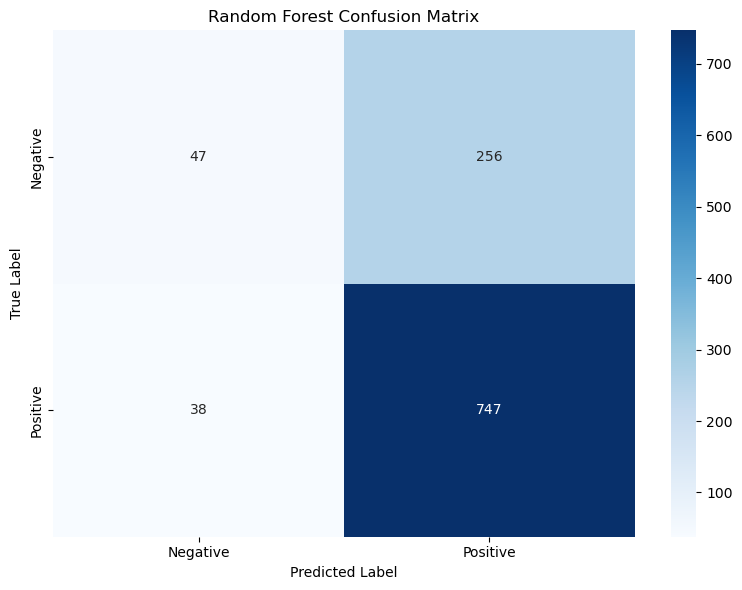

Random Forest ROC AUC Score: 0.5534


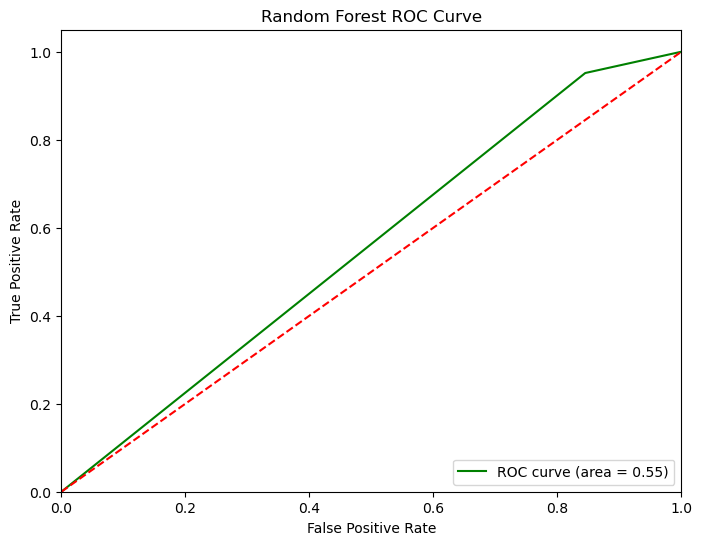

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Predict
y_pred_rf = rf.predict(X_test_pca)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

### LSTM

Epoch 1/10
136/136 [==============================] - 5s 17ms/step - loss: 0.6034 - accuracy: 0.6845 - val_loss: 0.5942 - val_accuracy: 0.6903
Epoch 2/10
136/136 [==============================] - 1s 11ms/step - loss: 0.5597 - accuracy: 0.7217 - val_loss: 0.5880 - val_accuracy: 0.7068
Epoch 3/10
136/136 [==============================] - 2s 11ms/step - loss: 0.5371 - accuracy: 0.7401 - val_loss: 0.5897 - val_accuracy: 0.7123
Epoch 4/10
136/136 [==============================] - 2s 11ms/step - loss: 0.5210 - accuracy: 0.7443 - val_loss: 0.5972 - val_accuracy: 0.6994
Epoch 5/10
136/136 [==============================] - 2s 11ms/step - loss: 0.5074 - accuracy: 0.7560 - val_loss: 0.5971 - val_accuracy: 0.6994
Epoch 6/10
136/136 [==============================] - 1s 10ms/step - loss: 0.4909 - accuracy: 0.7716 - val_loss: 0.6049 - val_accuracy: 0.7004
Epoch 7/10
136/136 [==============================] - 2s 12ms/step - loss: 0.4773 - accuracy: 0.7822 - val_loss: 0.5950 - val_accuracy: 0.7132

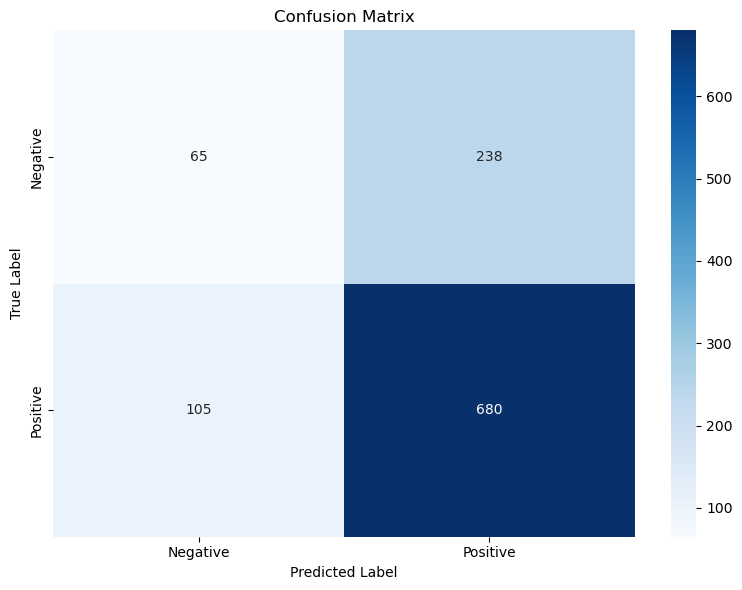

ROC AUC Score: 0.5404


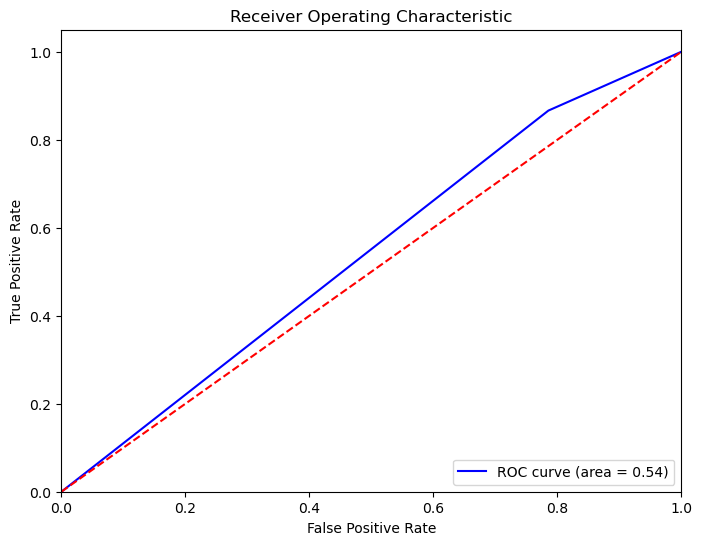

In [18]:
# Assuming X_train and X_test are the raw time-series data
# Reshape to 3D: [samples, time_steps, features]
time_steps = 14  # Adjust according to your sequence length
X_train_reshaped = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1] // time_steps)
X_test_reshaped = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1] // time_steps)

# Create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))  # For binary classification (adjust for multi-class)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype(int)  # Convert to binary class (0 or 1)

# Print classification report
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix display
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC for LSTM
roc_auc_score_value = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc_score_value:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score_value)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Testing on Balanced Dataset by Undersampling

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Step 1: Combine features and labels
df = pd.DataFrame(X)
df['label'] = all_labels

# Step 2: Separate majority and minority classes
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]

# Step 3: Undersample class 1
class_1_downsampled = resample(class_1,
                               replace=False,
                               n_samples=len(class_0),
                               random_state=42)

# Step 4: Combine and shuffle
balanced_df = pd.concat([class_0, class_1_downsampled])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Split into features and labels
X_balanced = balanced_df.drop('label', axis=1).values
y_balanced = balanced_df['label'].values

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Done!
print("Class distribution after balancing:", np.bincount(y_balanced))
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Class distribution after balancing: [1590 1590]
Training set shape: (2544, 1736)
Test set shape: (636, 1736)


In [20]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform PCA to retain 95% of the variance
pca = PCA(n_components=0.95)  # This will retain enough components to explain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)

print(f"Number of components chosen by PCA: {pca.n_components_}")
print(f"Variance explained by the selected components: {sum(pca.explained_variance_ratio_)}")

Number of components chosen by PCA: 36
Variance explained by the selected components: 0.9508154607433943


LDA Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       335
           1       0.62      0.68      0.65       301

    accuracy                           0.65       636
   macro avg       0.65      0.65      0.65       636
weighted avg       0.66      0.65      0.65       636



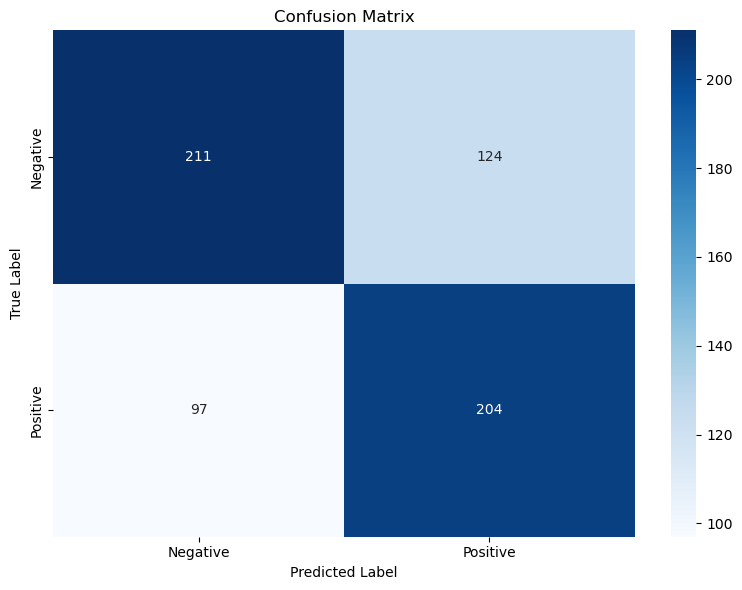

ROC AUC Score: 0.6538


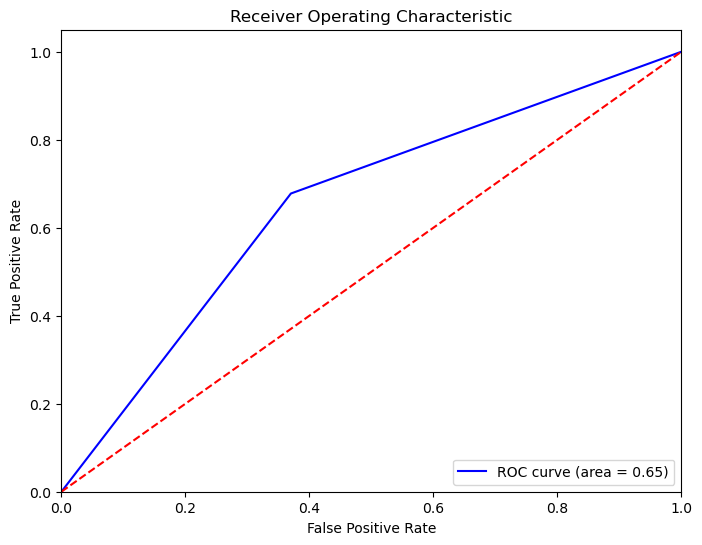

In [21]:
from sklearn.metrics import roc_curve

# Create an LDA model
lda = LDA()
lda.fit(X_train_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
y_pred_lda = lda.predict(X_test_pca)

# Print metrics
print("LDA Classification Report:")
print(classification_report(y_test, y_pred_lda))

# Create confusion matrix display
conf_matrix = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC for LDA:
roc_auc_score_value = roc_auc_score(y_test, y_pred_lda)
print(f"ROC AUC Score: {roc_auc_score_value:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score_value)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       335
           1       0.57      0.57      0.57       301

    accuracy                           0.59       636
   macro avg       0.59      0.59      0.59       636
weighted avg       0.59      0.59      0.59       636



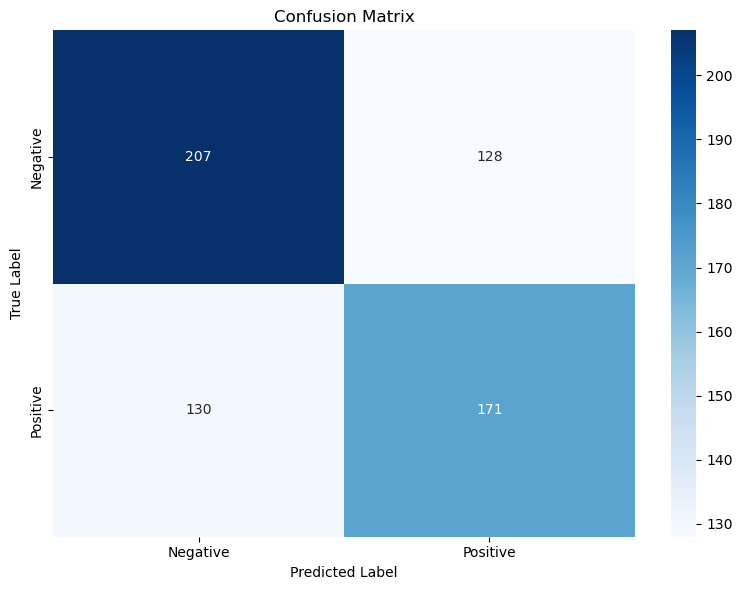

ROC AUC Score: 0.5930


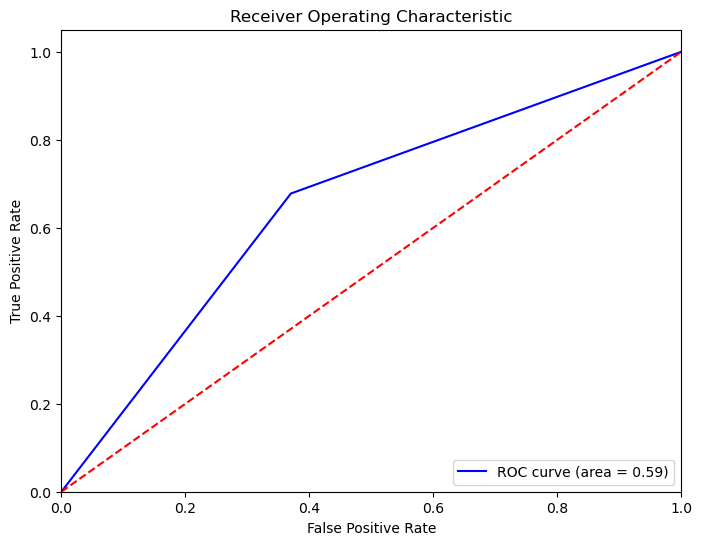

In [22]:
ncc = NCC()
ncc.fit(X_train_pca, y_train)
y_pred_lr = ncc.predict(X_test_pca)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

conf_matrix_ncc = confusion_matrix(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC for NCC:
roc_auc_score_value = roc_auc_score(y_test, y_pred_lr)
print(f"ROC AUC Score: {roc_auc_score_value:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score_value)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Regularized LDA (R-LDA) Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       335
           1       0.59      0.65      0.62       301

    accuracy                           0.62       636
   macro avg       0.62      0.62      0.62       636
weighted avg       0.63      0.62      0.62       636



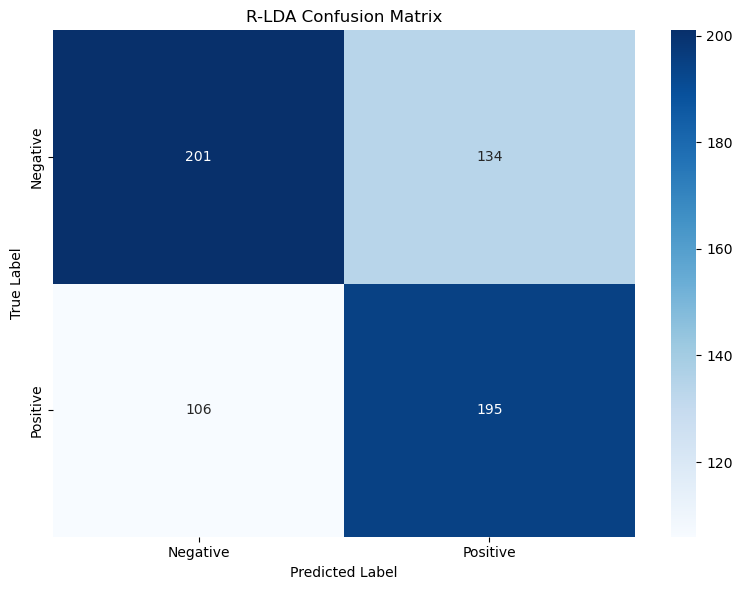

R-LDA ROC AUC Score: 0.6239


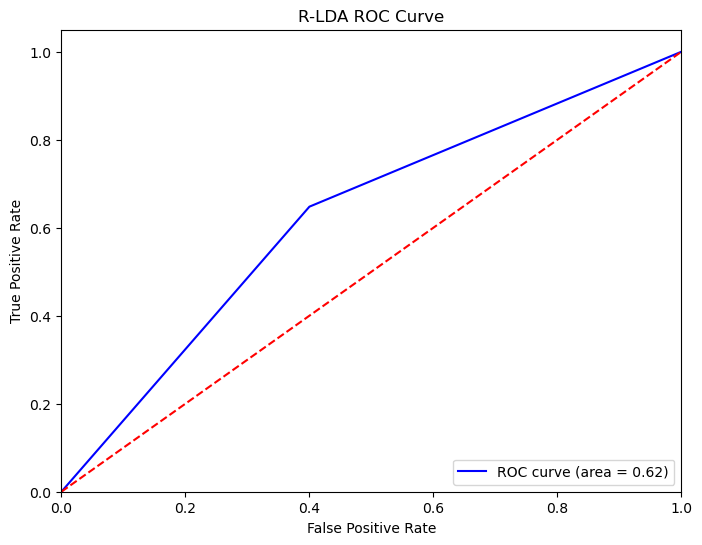

In [23]:
# Create and train LDA with shrinkage (real R-LDA)
rlda = LDA(solver='lsqr', shrinkage=0.5)  # 'auto' lets sklearn choose optimal shrinkage via Ledoit-Wolf
rlda.fit(X_train_pca, y_train)

# Predict
y_pred_rlda = rlda.predict(X_test_pca)

# Classification report
print("Regularized LDA (R-LDA) Classification Report:")
print(classification_report(y_test, y_pred_rlda))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rlda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('R-LDA Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_rlda)
print(f"R-LDA ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rlda)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('R-LDA ROC Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       335
           1       0.60      0.65      0.62       301

    accuracy                           0.63       636
   macro avg       0.63      0.63      0.63       636
weighted avg       0.63      0.63      0.63       636



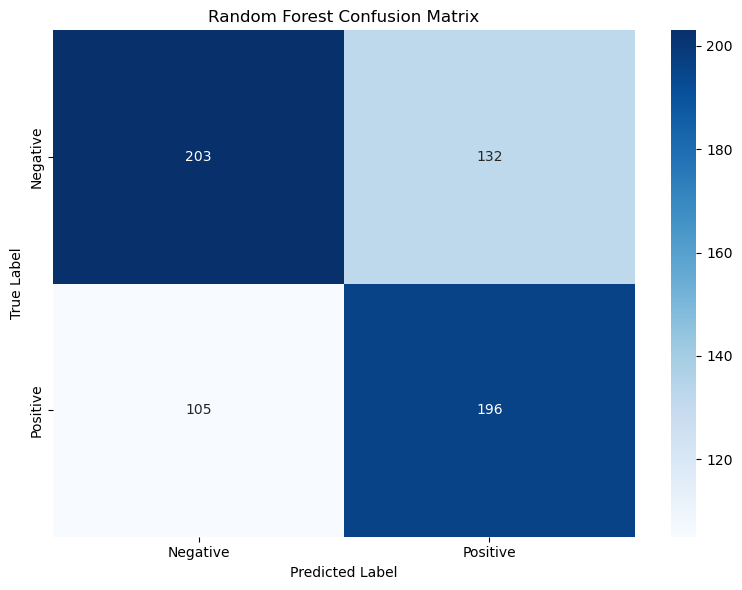

Random Forest ROC AUC Score: 0.6286


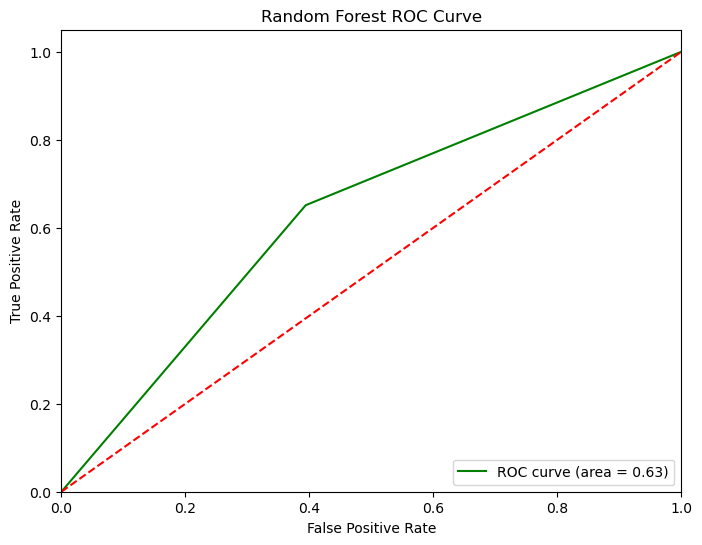

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Predict
y_pred_rf = rf.predict(X_test_pca)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

Epoch 1/10
80/80 [==============================] - 6s 24ms/step - loss: 0.6870 - accuracy: 0.5857 - val_loss: 0.6788 - val_accuracy: 0.5928
Epoch 2/10
80/80 [==============================] - 1s 14ms/step - loss: 0.6183 - accuracy: 0.6655 - val_loss: 0.6817 - val_accuracy: 0.5912
Epoch 3/10
80/80 [==============================] - 1s 12ms/step - loss: 0.5896 - accuracy: 0.6961 - val_loss: 0.6779 - val_accuracy: 0.5991
Epoch 4/10
80/80 [==============================] - 1s 14ms/step - loss: 0.5587 - accuracy: 0.7276 - val_loss: 0.6837 - val_accuracy: 0.5959
Epoch 5/10
80/80 [==============================] - 1s 12ms/step - loss: 0.5332 - accuracy: 0.7504 - val_loss: 0.6868 - val_accuracy: 0.5975
Epoch 6/10
80/80 [==============================] - 1s 11ms/step - loss: 0.5131 - accuracy: 0.7630 - val_loss: 0.6764 - val_accuracy: 0.6069
Epoch 7/10
80/80 [==============================] - 1s 12ms/step - loss: 0.4908 - accuracy: 0.7972 - val_loss: 0.6968 - val_accuracy: 0.5833
Epoch 8/10
80

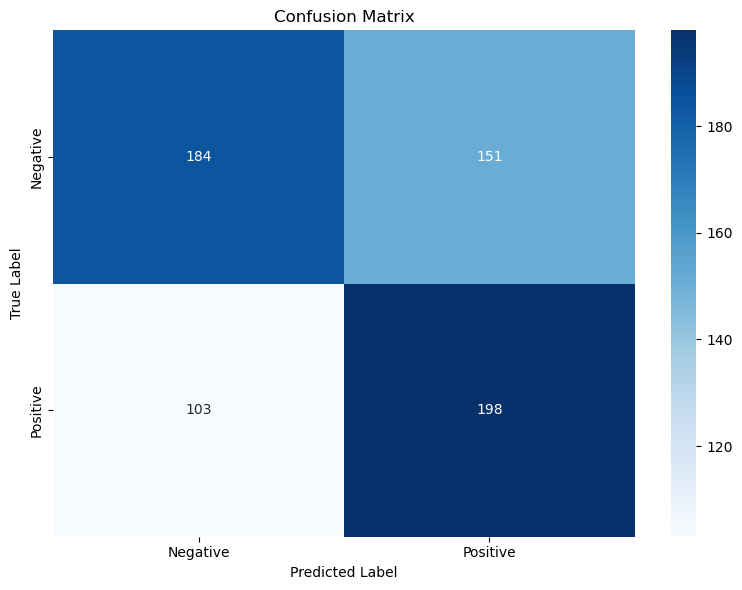

ROC AUC Score: 0.6035


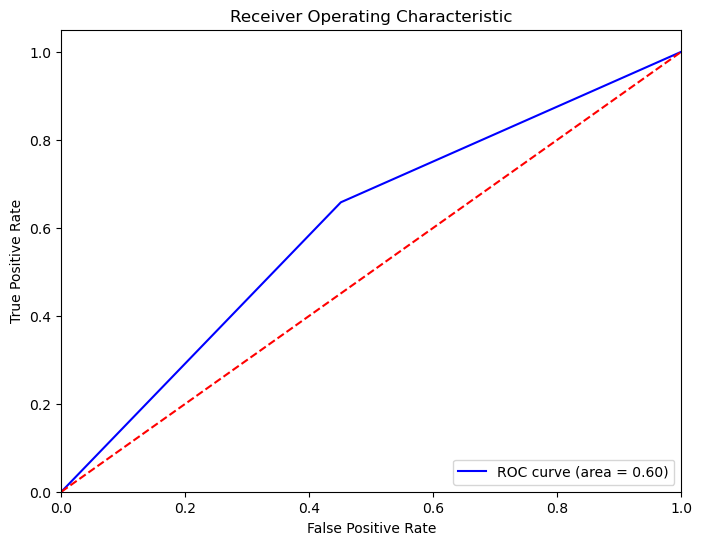

In [25]:
# Assuming X_train and X_test are the raw time-series data
# Reshape to 3D: [samples, time_steps, features]
time_steps = 14  # Adjust according to your sequence length
X_train_reshaped = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1] // time_steps)
X_test_reshaped = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1] // time_steps)

# Create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))  # For binary classification (adjust for multi-class)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype(int)  # Convert to binary class (0 or 1)

# Print classification report
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix display
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC AUC for LSTM
roc_auc_score_value = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc_score_value:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score_value)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()